<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#multi-class classiciation
# softmax regression
# one vs all
# one vs one

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
plot_colors = "ryb"
plot_step = 0.02

In [4]:
def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)

    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):

            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()

    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()

In [5]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In [16]:
def main():
    # load dataset
    pair = [1, 3]
    iris = datasets.load_iris()
    X = iris.data[:, pair]
    y = iris.target
    np.unique(y)

    # plot dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel("sepal width (cm)")
    plt.ylabel("petal width")
    plt.title("Figure 1: Scatter plot of the dataset")
    plt.show()

    print("""
    Figure 1 explanation:
    The scatter plot of the dataset is important to visualize the distribution of the data points and observe any
    potential patterns or clusters based on the target classes. It helps in understanding the separability of the
    classes and the complexity of the classification task.
    """)

    print("\n" * 3)  # Add spacing between the explanation and the next chart

    # softmax regression
    lr = LogisticRegression(random_state=0).fit(X, y)

    # generate the probability
    probability = lr.predict_proba(X)

    plt.figure(figsize=(8, 6))
    plt.title("Figure 2: Probability plot of softmax regression")
    plot_probability_array(X, probability)
    plt.show()

    print("""
    Figure 2 explanation:
    The probability plot of softmax regression visualizes the predicted probabilities of each class for each data point.
    It helps in understanding how confident the classifier is in its predictions and how well it distinguishes
    between different classes.
    """)

    print("\n" * 3)  # Add spacing between the explanation and the next chart

    # svm
    model = SVC(kernel='linear', gamma=.5, probability=True)
    model.fit(X, y)

    # plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.title("Figure 3: Decision boundary of SVM")
    decision_boundary(X, y, model, iris)
    plt.show()

    print("""
    Figure 3 explanation:
    The decision boundary plot of SVM shows how the classifier separates the different classes in the feature space.
    It helps in understanding the decision regions and the effectiveness of the classifier in distinguishing between classes.
    """)

    print("\n" * 3)  # Add spacing between the explanation and the next chart

    # one vs All (one vs Rest)
    # train each classifier
    dummy_class = y.max() + 1
    my_models = []
    for i, class_ in enumerate(np.unique(y)):
        select = (y == class_)
        temp_y = np.zeros(y.shape)
        temp_y[y == class_] = class_
        temp_y[y != class_] = dummy_class
        model = SVC(kernel='linear', gamma=.5, probability=True)
        my_models.append(model.fit(X, temp_y))

        plt.figure(figsize=(8, 6))
        plt.title(f"Figure {4+i}: Decision boundary of One vs All - Class {class_}")
        decision_boundary(X, temp_y, model, iris)
        plt.show()

        print(f"""
        Figure {4+i} explanation:
        The decision boundary plot of One vs All for Class {class_} visualizes how the individual classifier distinguishes
        this class from the rest. It helps in understanding the effectiveness of the classifier in separating its respective
        class from the others.
        """)

        print("\n" * 3)  # Add spacing between the explanation and the next chart

    # calculate the probability
    probability_array = np.zeros((X.shape[0], 3))
    for j, model in enumerate(my_models):
        real_class = np.where(np.array(model.classes_) != 3)[0]
        probability_array[:, j] = model.predict_proba(X)[:, real_class][:, 0]

    # plot probability
    plt.figure(figsize=(8, 6))
    plt.title("Figure 7: Probability plot of One vs All")
    plot_probability_array(X, probability_array)
    plt.show()

    print("""
    Figure 7 explanation:
    The probability plot of One vs All classification visualizes the predicted probabilities of each class for each data point
    using the individual classifiers. It helps in understanding how confident each classifier is in its predictions and how well
    they distinguish between classes.
    """)

    print("\n" * 3)  # Add spacing between the explanation and the next chart

    # one vs one
    classes_ = set(np.unique(y))
    pairs = []
    left_overs = classes_.copy()
    my_models = []
    figure_count = 8
    for i, class_ in enumerate(classes_):
        left_overs.remove(class_)
        for j, second_class in enumerate(left_overs):
            pairs.append(str(class_) + ' and ' + str(second_class))
            print("class {} vs class {} ".format(class_, second_class))
            temp_y = np.zeros(y.shape)
            select = np.logical_or(y == class_, y == second_class)
            model = SVC(kernel='linear', gamma=.5, probability=True)
            model.fit(X[select, :], y[select])
            my_models.append(model)

            plt.figure(figsize=(8, 6))
            plt.title(f"Figure {figure_count}: Decision boundary of One vs One - Class {class_} vs {second_class}")
            decision_boundary(X[select, :], y[select], model, iris, two=True)
            plt.show()

            print(f"""
            Figure {figure_count} explanation:
            The decision boundary plot of One vs One for Class {class_} vs Class {second_class} visualizes how the individual
            classifier distinguishes between these two classes. It helps in understanding the effectiveness of the classifier
            in separating the two classes in this pair.
            """)

            print("\n" * 3)  # Add spacing between the explanation and the next chart
            figure_count += 1

    print(pairs)

    majority_vote_array = np.zeros((X.shape[0], 3))
    majority_vote_dict = {}
    for j, (model, pair) in enumerate(zip(my_models, pairs)):
        majority_vote_dict[pair] = model.predict(X)
        majority_vote_array[:, j] = model.predict(X)

    print(pd.DataFrame(majority_vote_dict).head(10))

    print("""
    Table explanation:
    The table shows the predictions of each classifier for each pair of classes. It helps in understanding how each classifier
    votes for each data point and visualizes the majority voting process used in One vs One classification.
    """)

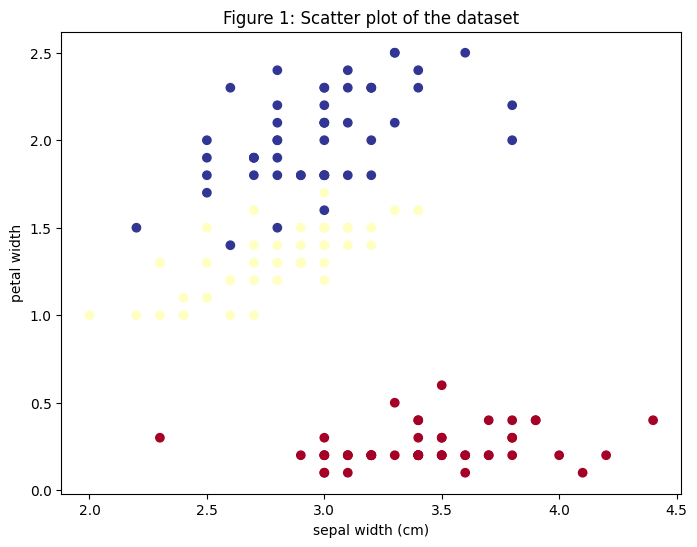


    Figure 1 explanation:
    The scatter plot of the dataset is important to visualize the distribution of the data points and observe any
    potential patterns or clusters based on the target classes. It helps in understanding the separability of the
    classes and the complexity of the classification task.
    






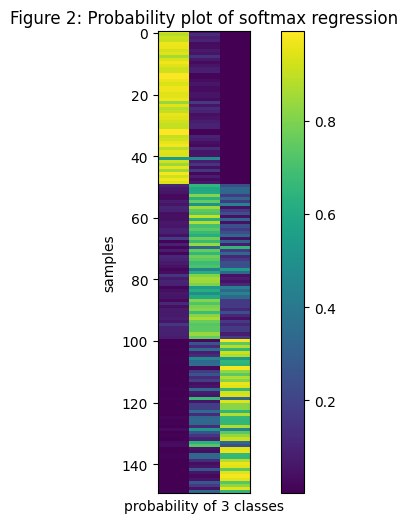


    Figure 2 explanation:
    The probability plot of softmax regression visualizes the predicted probabilities of each class for each data point.
    It helps in understanding how confident the classifier is in its predictions and how well it distinguishes
    between different classes.
    




{0, 1, 2}


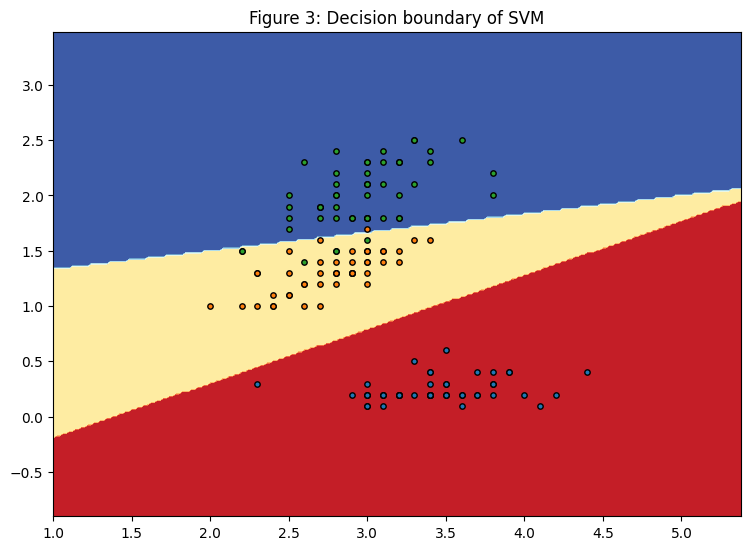


    Figure 3 explanation:
    The decision boundary plot of SVM shows how the classifier separates the different classes in the feature space.
    It helps in understanding the decision regions and the effectiveness of the classifier in distinguishing between classes.
    




{0, 1, 2}


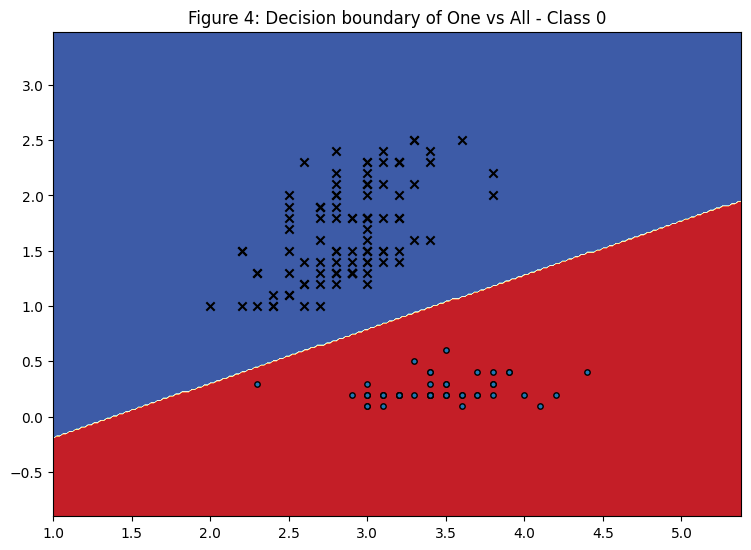


        Figure 4 explanation:
        The decision boundary plot of One vs All for Class 0 visualizes how the individual classifier distinguishes
        this class from the rest. It helps in understanding the effectiveness of the classifier in separating its respective
        class from the others.
        




{0, 1, 2}


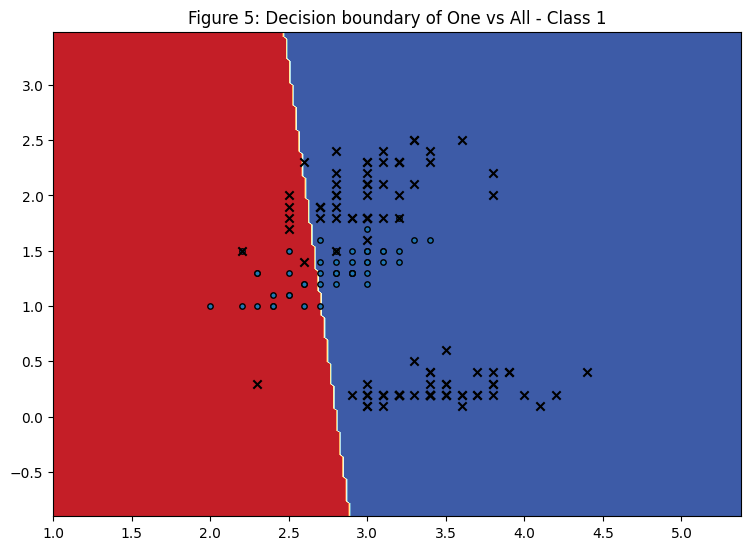


        Figure 5 explanation:
        The decision boundary plot of One vs All for Class 1 visualizes how the individual classifier distinguishes
        this class from the rest. It helps in understanding the effectiveness of the classifier in separating its respective
        class from the others.
        




{0, 1, 2}


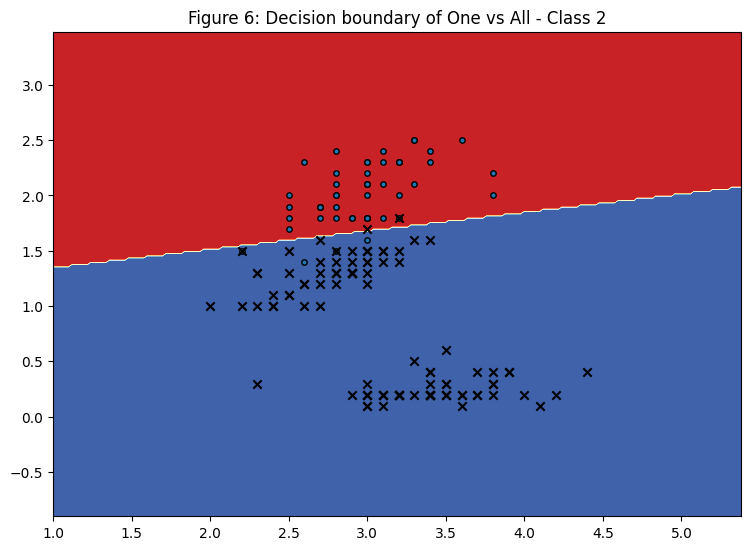


        Figure 6 explanation:
        The decision boundary plot of One vs All for Class 2 visualizes how the individual classifier distinguishes
        this class from the rest. It helps in understanding the effectiveness of the classifier in separating its respective
        class from the others.
        






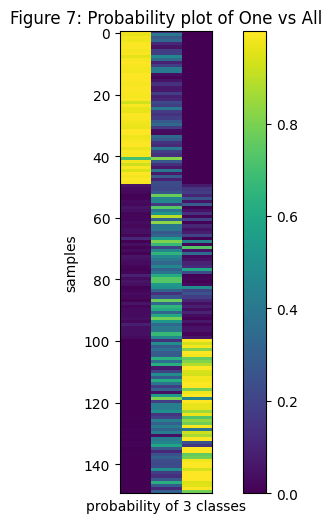


    Figure 7 explanation:
    The probability plot of One vs All classification visualizes the predicted probabilities of each class for each data point
    using the individual classifiers. It helps in understanding how confident each classifier is in its predictions and how well
    they distinguish between classes.
    




class 0 vs class 1 


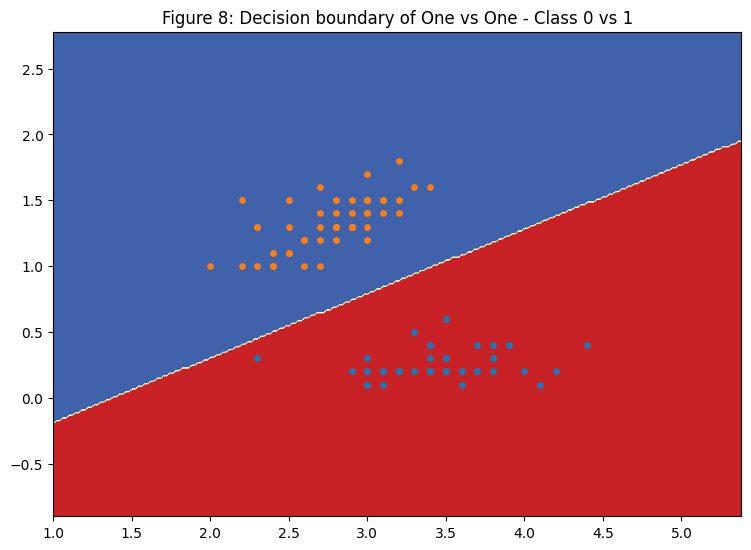


            Figure 8 explanation:
            The decision boundary plot of One vs One for Class 0 vs Class 1 visualizes how the individual
            classifier distinguishes between these two classes. It helps in understanding the effectiveness of the classifier
            in separating the two classes in this pair.
            




class 0 vs class 2 


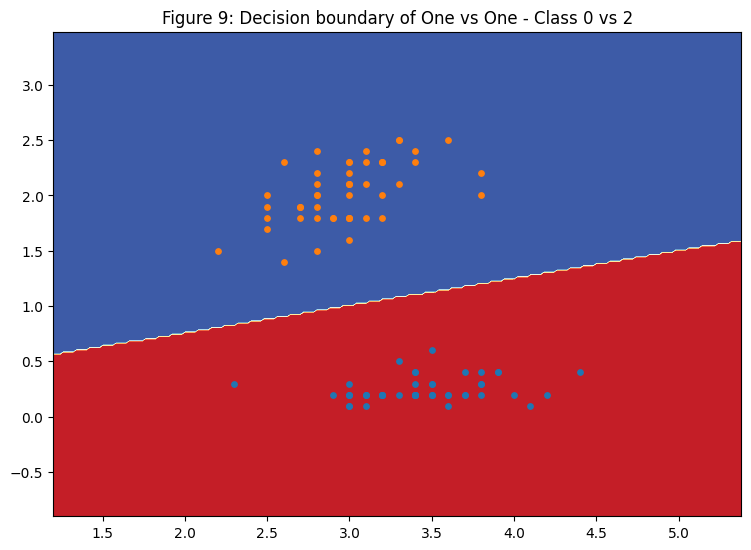


            Figure 9 explanation:
            The decision boundary plot of One vs One for Class 0 vs Class 2 visualizes how the individual
            classifier distinguishes between these two classes. It helps in understanding the effectiveness of the classifier
            in separating the two classes in this pair.
            




class 1 vs class 2 


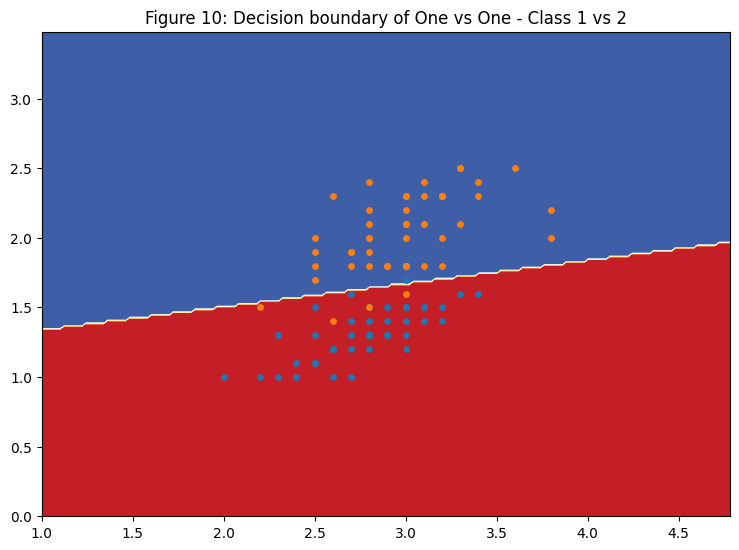


            Figure 10 explanation:
            The decision boundary plot of One vs One for Class 1 vs Class 2 visualizes how the individual
            classifier distinguishes between these two classes. It helps in understanding the effectiveness of the classifier
            in separating the two classes in this pair.
            




['0 and 1', '0 and 2', '1 and 2']
   0 and 1  0 and 2  1 and 2
0        0        0        1
1        0        0        1
2        0        0        1
3        0        0        1
4        0        0        1
5        0        0        1
6        0        0        1
7        0        0        1
8        0        0        1
9        0        0        1

    Table explanation:
    The table shows the predictions of each classifier for each pair of classes. It helps in understanding how each classifier
    votes for each data point and visualizes the majority voting process used in One vs One classification.
    


In [17]:
if __name__ == "__main__":
    main()